# Practice notebook for confidence intervals using NHANES data

This notebook will give you the opportunity to practice working with confidence intervals using the NHANES data.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.proportion import confint_proportions_2indep
from statsmodels.stats.weightstats import ttest_ind


da = pd.read_csv('/content/drive/My Drive/nhanes_2015_2016.csv')


In [ ]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [ ]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   ALQ101    5208 non-null   float64
 2   ALQ110    1731 non-null   float64
 3   ALQ130    3379 non-null   float64
 4   SMQ020    5735 non-null   int64  
 5   RIAGENDR  5735 non-null   int64  
 6   RIDAGEYR  5735 non-null   int64  
 7   RIDRETH1  5735 non-null   int64  
 8   DMDCITZN  5734 non-null   float64
 9   DMDEDUC2  5474 non-null   float64
 10  DMDMARTL  5474 non-null   float64
 11  DMDHHSIZ  5735 non-null   int64  
 12  WTINT2YR  5735 non-null   float64
 13  SDMVPSU   5735 non-null   int64  
 14  SDMVSTRA  5735 non-null   int64  
 15  INDFMPIR  5134 non-null   float64
 16  BPXSY1    5401 non-null   float64
 17  BPXDI1    5401 non-null   float64
 18  BPXSY2    5535 non-null   float64
 19  BPXDI2    5535 non-null   float64
 20  BMXWT     5666 non-null   floa

## Question 1

Restrict the sample to women between 35 and 50, then use the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to partition this sample into two groups - women who are currently married, and women who are not currently married.  Within each of these groups, calculate the proportion of women who have completed college.  Calculate 95% confidence intervals for each of these proportions.

In [ ]:
# This is a long approach to identify the proportion first
# a much shorter approach would be used for the next question
df=da.loc[(da.RIAGENDR==2) & ((da.RIDAGEYR >= 35) & (da.RIDAGEYR <= 50) )]
df

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
34,83799,NaN,NaN,NaN,2,2,37,2,1.0,4.0,...,110.0,72.0,66.6,161.6,25.5,NaN,NaN,NaN,NaN,2.0
50,83828,1.0,NaN,2.0,2,2,39,1,2.0,3.0,...,100.0,62.0,71.3,162.0,27.2,36.8,34.6,29.1,94.6,NaN
52,83832,2.0,1.0,4.0,2,2,50,1,2.0,1.0,...,NaN,NaN,105.9,157.7,42.6,29.2,35.0,40.7,129.1,NaN
55,83837,2.0,2.0,NaN,2,2,45,1,1.0,2.0,...,114.0,68.0,77.5,148.3,35.2,30.5,34.0,34.4,107.6,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5658,93568,1.0,NaN,1.0,1,2,46,3,1.0,2.0,...,128.0,84.0,85.5,152.4,36.8,26.0,33.5,34.7,116.5,2.0
5685,93612,2.0,2.0,NaN,2,2,36,5,1.0,5.0,...,112.0,74.0,65.7,162.4,24.9,37.2,36.0,29.8,89.0,2.0
5689,93619,NaN,NaN,NaN,2,2,44,5,2.0,2.0,...,118.0,78.0,51.9,149.3,23.3,31.9,32.0,26.2,81.4,1.0
5721,93676,1.0,NaN,2.0,2,2,35,4,1.0,5.0,...,114.0,76.0,92.2,161.7,35.3,41.5,37.5,38.9,110.9,2.0


In [ ]:
# married women between 35 and 50
married_data=df.loc[df.DMDMARTL==1]
married_data



,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
34,83799,NaN,NaN,NaN,2,2,37,2,1.0,4.0,...,110.0,72.0,66.6,161.6,25.5,NaN,NaN,NaN,NaN,2.0
50,83828,1.0,NaN,2.0,2,2,39,1,2.0,3.0,...,100.0,62.0,71.3,162.0,27.2,36.8,34.6,29.1,94.6,NaN
55,83837,2.0,2.0,NaN,2,2,45,1,1.0,2.0,...,114.0,68.0,77.5,148.3,35.2,30.5,34.0,34.4,107.6,2.0
61,83851,2.0,1.0,1.0,1,2,37,3,1.0,3.0,...,122.0,74.0,85.1,155.3,35.3,32.5,33.6,36.1,106.5,1.0
62,83853,NaN,NaN,NaN,2,2,49,3,1.0,3.0,...,116.0,84.0,76.1,166.7,27.4,39.2,38.6,32.6,88.7,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5609,93488,2.0,1.0,1.0,2,2,47,4,1.0,4.0,...,104.0,66.0,57.9,158.0,23.2,37.2,36.0,28.1,79.4,2.0
5627,93516,NaN,NaN,NaN,2,2,43,2,1.0,4.0,...,124.0,78.0,82.7,165.3,30.3,38.8,38.8,32.2,102.2,NaN
5685,93612,2.0,2.0,NaN,2,2,36,5,1.0,5.0,...,112.0,74.0,65.7,162.4,24.9,37.2,36.0,29.8,89.0,2.0
5689,93619,NaN,NaN,NaN,2,2,44,5,2.0,2.0,...,118.0,78.0,51.9,149.3,23.3,31.9,32.0,26.2,81.4,1.0


In [ ]:
# 95% confidence interval of married women between 35 and 50 who completed college
p=(married_data.DMDEDUC2==5).mean()
n=len(married_data.DMDEDUC2)
print(p,n)
sm.stats.proportion_confint(n * p, n, alpha=0.05, method='normal')

0.36080178173719374 449


(0.31638193710753626, 0.4052216263668512)

In [ ]:
# checking to see if refused or dont know are part of the dataset and they arent
df.DMDMARTL.unique()

array([3., 1., 4., 5., 6., 2.])

In [ ]:
# not currently married women between 35 and 50
unmarried_data=df.loc[df.DMDMARTL!=1]
unmarried_data

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
52,83832,2.0,1.0,4.0,2,2,50,1,2.0,1.0,...,NaN,NaN,105.9,157.7,42.6,29.2,35.0,40.7,129.1,NaN
58,83845,1.0,NaN,NaN,1,2,44,4,1.0,1.0,...,116.0,78.0,133.3,171.5,45.3,37.3,35.7,48.7,NaN,2.0
100,83911,1.0,NaN,1.0,2,2,43,4,1.0,4.0,...,126.0,76.0,91.1,172.3,30.7,40.4,38.2,34.6,101.6,NaN
127,83958,2.0,1.0,2.0,1,2,47,4,1.0,3.0,...,148.0,76.0,58.6,160.6,22.7,36.8,35.2,28.0,77.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5559,93386,1.0,NaN,2.0,2,2,50,4,1.0,4.0,...,134.0,84.0,91.3,160.5,35.4,43.0,38.5,40.0,112.9,2.0
5582,93434,1.0,NaN,1.0,1,2,36,4,1.0,3.0,...,126.0,70.0,58.3,162.5,22.1,37.6,35.8,26.9,75.5,2.0
5623,93511,2.0,2.0,NaN,2,2,40,4,1.0,3.0,...,148.0,108.0,98.8,167.3,35.3,37.6,38.5,44.6,129.7,1.0
5658,93568,1.0,NaN,1.0,1,2,46,3,1.0,2.0,...,128.0,84.0,85.5,152.4,36.8,26.0,33.5,34.7,116.5,2.0


In [ ]:
# 95% confidence interval of not currently married women between 35 and 50 who completed college
p2=(unmarried_data.DMDEDUC2==5).mean()
n2=len(unmarried_data.DMDEDUC2)
print(p2,n2)
sm.stats.proportion_confint(n2 * p2, n2, alpha=0.05, method='normal')

0.21301775147928995 338


(0.16936816767089768, 0.2566673352876822)

__Q1a.__ Identify which of the two confidence intervals is wider, and explain why this is the case.

In [ ]:
l,h=sm.stats.proportion_confint(n * p, n)
print(h-l)
l2,h2=sm.stats.proportion_confint(n2 * p2, n2)
print(h2-l2)

0.08883968925931496
0.08729916761678452


Text(0.5, 1.0, 'how standard error varies with proportion')

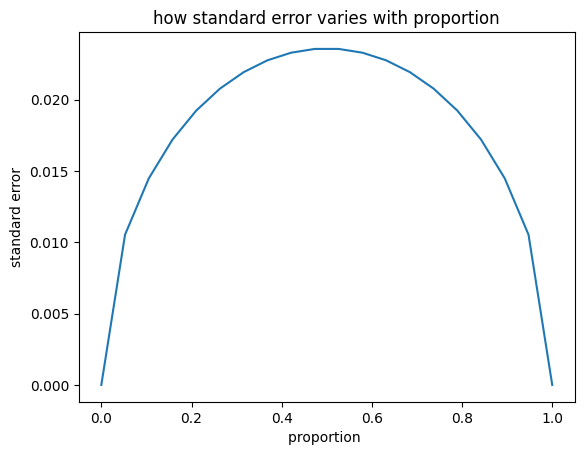

In [ ]:
# despite the first data set having a larger data set, as p gets closer to 0.5 it is maximized
# this caused the first confdence interval to be higher but only marginally due to the higher sample size of the first group
k=intervals = np.linspace(0, 1, 20)
se = np.sqrt(k * (1 - k) / n)
plt.plot(k,se)
plt.xlabel('proportion ')
plt.ylabel('standard error')
plt.title('how standard error varies with proportion')

In sumary the first confidence interval was marginally wider despite having a bigger sample size and this is due to its proportion being closer to 0.5 than the second. This offset the reduction in confidence interval that would have normally been observed because of the bigger sample size.


__Q1b.__ Write 1-2 sentences summarizing these findings for an audience that does not know what a confidence interval is (the goal here is to report the substance of what you learned about how marital status and educational attainment are related, not to teach a person what a confidence interval is).

We estimate with 95 percent confidence that population proportion of married women aged 35-50 who have completed college is between 31.6% and 40.5% while the proportion of women who arent married aged 35-50 who have completed college is betwwen 17% and 25.6%.  

These results are significant and we have casue to believe that the proportion of the first group is higher than the second.

## Question 2

Construct a 95% confidence interval for the proportion of smokers who are female. Construct a 95% confidence interval for the proportion of smokers who are male. Construct a 95% confidence interval for the **difference** between those two gender proportions.

In [ ]:
# 95% confidence interval of smokers who are women
smokers_women = da.loc[((da.SMQ020 == 1) & (da.RIAGENDR == 2))]
ci_women = sm.stats.proportion_confint(len(smokers_women), len(da.loc[da.SMQ020 == 1]), alpha=0.05, method='normal')

ci_women



(0.37082779392969883, 0.41054348679475133)

In [ ]:
# 95% confidence interval of smokers who are men
smokers_men = da.loc[(da.SMQ020 == 1) & (da.RIAGENDR == 1)]
ci_men = sm.stats.proportion_confint(len(smokers_men), len(da.loc[da.SMQ020 == 1]), alpha=0.05, method='normal')
ci_men

(0.5894565132052486, 0.6291722060703012)

In [ ]:
#Construct a 95% confidence interval for the difference between male and female proportions.
count=[len(smokers_men),len(smokers_women)]
nobs=len(da.loc[da.SMQ020 == 1])
diff_confint=confint_proportions_2indep(count[0],nobs,count[1],nobs,method=None,compare='diff',alpha=0.05,correction=True)
diff_confint

(0.19031188657874618, 0.24643422485934194)

__Q2a.__ Why might it be relevant to report the separate gender proportions **and** the difference between the gender proportions?

It might be relevant to report the separat gender proportions and the difference between the gender proportions because we might need to investigate the smoking habits of the genders separately and also see how they differ. The difference between the gender proportions is a very convenient way to compare the two genders instead of comparing separate confidence intervals. It is faster and easier.

__Q2b.__ How does the **width** of the confidence interval for the difference between the gender proportions compare to the widths of the confidence intervals for the separate gender proportions?

In [ ]:
print(ci_women[1]-ci_women[0])
print(ci_men[1]-ci_men[0])
print(diff_confint[1]-diff_confint[0])

0.0397156928650525
0.03971569286505261
0.05612233828059576


The difference confidence interval is wider than that for the individual genders


## Question 3

Construct a 95% interval for height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)) in centimeters.  Then convert height from centimeters to inches by dividing by 2.54, and construct a 95% confidence interval for height in inches.  Finally, convert the endpoints (the lower and upper confidence limits) of the confidence interval from inches to back to centimeters   

In [ ]:
#95% interval for height (BMXHT) in centimeters
height=da["BMXHT"].dropna()
sm.stats.DescrStatsW(height).zconfint_mean()

(165.88055125872887, 166.40511769949427)

In [ ]:
#95% interval for height (BMXHT) in inches
height=da["BMXHT"].dropna()/2.54
confint_inch=sm.stats.DescrStatsW(height).zconfint_mean()
confint_inch

(65.30730364516884, 65.51382586594264)

In [ ]:
#converting the endpoints (the lower and upper confidence limits) of the confidence interval from inches to back to centimeters
np.array(confint_inch)*2.54

array([165.88055126, 166.4051177 ])

__Q3a.__ Describe how the confidence interval constructed in centimeters relates to the confidence interval constructed in inches.

confidence interval in centimeters = confidence interval in inches/ 2.54

## Question 4

Partition the sample based on 10-year age bands, i.e. the resulting groups will consist of people with ages from 18-28, 29-38, etc. Construct 95% confidence intervals for the difference between the mean BMI for females and for males within each age band.

In [ ]:
da.RIDAGEYR.min()

18

In [ ]:
da.RIDAGEYR.max()

80

In [ ]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [17, 28, 38, 48, 58, 68, 78, 88])


In [ ]:
age_group_list=sorted(da["agegrp"].dropna().unique())
age_group_list


[Interval(17, 28, closed='right'),
 Interval(28, 38, closed='right'),
 Interval(38, 48, closed='right'),
 Interval(48, 58, closed='right'),
 Interval(58, 68, closed='right'),
 Interval(68, 78, closed='right'),
 Interval(78, 88, closed='right')]

In [ ]:
df = da.dropna(subset=["BMXBMI"])


In [ ]:
df

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,agegrp
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0,"(58, 68]"
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN,"(48, 58]"
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0,"(68, 78]"
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0,"(48, 58]"
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0,"(38, 48]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,3.0,...,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0,"(68, 78]"
5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,5.0,...,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0,"(17, 28]"
5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,4.0,...,58.0,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0,"(78, 88]"
5733,93700,NaN,NaN,NaN,1,1,35,3,2.0,1.0,...,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0,"(28, 38]"


In [ ]:
# ensure all entries in the BMXBMI column are numbers
df.BMXBMI[pd.to_numeric(df['BMXBMI'], errors='coerce').isnull()].unique()

array([], dtype=float64)

In [ ]:
# df=df[pd.to_numeric(df['BMXBMI'], errors='coerce').notna()]

In [ ]:
# df.BMXBMI[pd.to_numeric(df['BMXBMI'], errors='coerce').isnull()].unique()

Before a confidence interval can be created for the difference in mean for independent datasets we have to test if we can use a pooled approach or unpooled approach.

 An informal check for this is to compare the ratio of the two sample variances. then a good Rule of Thumb to use is to see if the ratio falls from 0.5 to 2. That is, neither sample standard deviation is more than twice the other.

In [ ]:
 for age_group in df.agegrp.dropna().unique():
    bmi_males = df[(df.agegrp== age_group) & (df.RIAGENDR == 1)]['BMXBMI']
    bmi_females = df[(df.agegrp== age_group) & (df.RIAGENDR == 2)]['BMXBMI']

    bmi_males_temp=sm.stats.DescrStatsW(bmi_males)
    bmi_females_temp=sm.stats.DescrStatsW(bmi_females)
    print(age_group)
    print("Std Males: ", np.std(bmi_males))
    print("Std Females: ", np.std(bmi_females))
    print("Variance Ratio: ", (np.std(bmi_males)**2)/(np.std(bmi_females)**2))
    print("_________________________________________________________")


(58, 68]
Std Males:  5.952529408367408
Std Females:  7.771060178439661
Variance Ratio:  0.5867357560253481
_________________________________________________________
(48, 58]
Std Males:  6.144153177450539
Std Females:  7.639107277699185
Variance Ratio:  0.6469025317696486
_________________________________________________________
(68, 78]
Std Males:  5.327630164547575
Std Females:  6.768248515453769
Variance Ratio:  0.6196059006913647
_________________________________________________________
(38, 48]
Std Males:  6.097237131077363
Std Females:  8.036735756888811
Variance Ratio:  0.5755814554627979
_________________________________________________________
(17, 28]
Std Males:  6.772851485163334
Std Females:  7.953905067202027
Variance Ratio:  0.7250739437466444
_________________________________________________________
(28, 38]
Std Males:  6.719390520544581
Std Females:  7.950938058946232
Variance Ratio:  0.7142052271687328
_________________________________________________________
(78, 88]
S

All the variances fall between 0.5 - 2 so a pooled approach can be used

In [ ]:
 for age_group in df.agegrp.dropna().unique():
    bmi_males = df[(df.agegrp== age_group) & (df.RIAGENDR == 1)]['BMXBMI']
    bmi_females = df[(df.agegrp== age_group) & (df.RIAGENDR == 2)]['BMXBMI']

    bmi_males_temp=sm.stats.DescrStatsW(bmi_males)
    bmi_females_temp=sm.stats.DescrStatsW(bmi_females)

    cm = sm.stats.CompareMeans(bmi_males_temp, bmi_females_temp)
    lower, upper=cm.tconfint_diff(usevar='pooled')
    print(age_group)
    print("pooled: ", lower, ",", upper)
    print("pooled diff: ", upper-lower)
    print('---------------------------------------------------------------------------------------')


(58, 68]
pooled:  -2.7191581021392035 , -0.9252456993910773
pooled diff:  1.7939124027481261
---------------------------------------------------------------------------------------
(48, 58]
pooled:  -2.3314902075137223 , -0.4729688416549196
pooled diff:  1.8585213658588027
---------------------------------------------------------------------------------------
(68, 78]
pooled:  -2.8169097637577014 , -0.8181860593381438
pooled diff:  1.9987237044195576
---------------------------------------------------------------------------------------
(38, 48]
pooled:  -2.4438533490140424 , -0.5343193405535154
pooled diff:  1.909534008460527
---------------------------------------------------------------------------------------
(17, 28]
pooled:  -1.741339639227411 , 0.034817164017523994
pooled diff:  1.7761568032449349
---------------------------------------------------------------------------------------
(28, 38]
pooled:  -1.1877114002496385 , 0.6951862411159043
pooled diff:  1.8828976413655427
----

__Q4a.__ How do the widths of these confidence intervals differ?  Provide an explanation for any substantial diferences in the confidence interval widths that you see.

The confidence interval widths are very similar accross the age groups.

The age groups with smaller sample standard deviations have smaller sample size which balances out the effects on the confidence interval

## Question 5

Construct a 95% confidence interval for the first and second systolic blood pressure measures, and for the difference between the first and second systolic blood pressure measurements within a subject.

In [ ]:
#95% interval for the first systolic blood pressure measures
sy1=da["BPXSY1"].dropna()
ci_BPXSY1 = sm.stats.DescrStatsW(sy1).tconfint_mean()
ci_BPXSY1

(124.59163222328895, 125.57759569746646)

In [ ]:
#95% interval for the second systolic blood pressure measures
sy2=da["BPXSY2"].dropna()
ci_BPXSY2 = sm.stats.DescrStatsW(sy2).tconfint_mean()
ci_BPXSY2

(124.29482629577244, 125.27120803123749)

In [ ]:
# #95% interval for the difference between the first and second systolic blood pressure measures

dx = da.dropna(subset=["BPXSY1","BPXSY2"])

differences = dx.BPXSY1-dx.BPXSY2


ci_diff = sm.stats.DescrStatsW(differences).tconfint_mean()

print("Confidence Interval:", ci_diff)

Confidence Interval: (0.5399696008802797, 0.8100024609561889)


__Q5a.__ Based on these confidence intervals, would you say that a difference of zero between the population mean values of the first and second systolic blood pressure measures is consistent with the data?

Based on these confidence intervals, a difference of zero between the population mean values of the first and second systolic blood pressure measures is **not consistent** with the data because the confidence interval for the difference does not cover zero

__Q5b.__ Discuss how the width of the confidence interval for the within-subject difference compares to the widths of the confidence intervals for the first and second measures.

In [ ]:
#width of 95% interval for the first systolic blood pressure measures
ci_BPXSY1[1]-ci_BPXSY1[0]

0.9859634741775096

In [ ]:
#width of 95% interval for the second systolic blood pressure measures
ci_BPXSY2[1]-ci_BPXSY2[0]

0.9763817354650541

In [ ]:
# width of 95% interval for the difference between the first and second systolic blood pressure measures
ci_diff[1]-ci_diff[0]

0.2700328600759092

The confidence interval width for the within-subject difference is smaller compared to the widths of the confidence intervals for the first and second measures. This is because the within-subject difference data is less spread out than the individual blood pressure measures.

## Question 6

Construct a 95% confidence interval for the mean difference between the average age of a smoker, and the average age of a non-smoker.

In [ ]:
# ensure all entries in the RIDAGEYR column are numbers
da.RIDAGEYR[pd.to_numeric(da['RIDAGEYR'], errors='coerce').isnull()].unique()

array([], dtype=int64)

Before a confidence interval can be created for the difference in mean for independent datasets we have to test if we can use a pooled approach or unpooled approach.

An informal check for this is to compare the ratio of the two sample variances. then a good Rule of Thumb to use is to see if the ratio falls from 0.5 to 2. That is, neither sample standard deviation is more than twice the other.

In [ ]:
smokers_age = da.loc[(da.SMQ020 == 1)]['RIDAGEYR']
non_smokers_age = da.loc[(da.SMQ020 == 2)]['RIDAGEYR']

print("Std smokers age: ", np.std(smokers_age))
print("Std non smokers age: ", np.std(non_smokers_age))
print("Variance Ratio: ", (np.std(smokers_age)**2)/(np.std(non_smokers_age)**2))



Std smokers age:  17.45737571440166
Std non smokers age:  18.540563879157318
Variance Ratio:  0.8865679781025338


the variance ratio falls between 0.5 - 2 so a pooled approach can be used

In [ ]:
smokers_age_temp=sm.stats.DescrStatsW(smokers_age)
non_smokers_temp=sm.stats.DescrStatsW(non_smokers_age)

cm = sm.stats.CompareMeans(smokers_age_temp, non_smokers_temp)
ci_diff=cm.tconfint_diff(usevar='pooled')
print(ci_diff)


(5.880797225669984, 7.792718324216987)


__Q6a.__ Use graphical and numerical techniques to compare the variation in the ages of smokers to the variation in the ages of non-smokers.  

In [ ]:
da['SMQ020']

0       1
1       1
2       1
3       2
4       2
       ..
5730    1
5731    2
5732    1
5733    1
5734    2
Name: SMQ020, Length: 5735, dtype: int64

<Axes: xlabel='SMQ020', ylabel='RIDAGEYR'>

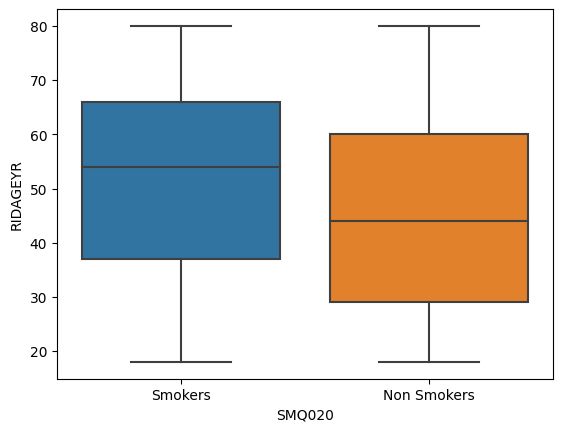

In [ ]:
dx=da.copy()
dx['SMQ020']=dx.SMQ020.map({1:'Smokers',2:'Non Smokers'})
dx=dx.dropna(subset=['SMQ020'])


sns.boxplot(x=dx.SMQ020, y=dx.RIDAGEYR)

__Q6b.__ Does it appear that uncertainty about the mean age of smokers, or uncertainty about the mean age of non-smokers contributed more to the uncertainty for the mean difference that we are focusing on here?

Since the standard deviation for non-smokers is larger, it is likely that the uncertainty in estimating the mean age of non-smokers contributes more to the overall uncertainty in the mean difference between smokers and non-smokers.